In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from scipy.optimize import curve_fit as cf
from scipy import stats

In [2]:
%matplotlib inline
plt.style.use('seaborn-poster')
sns.set()

This interactive notebook is based off code from Tirthajyoti Sarkar, see https://github.com/tirthajyoti/Interactive_Machine_Learning/blob/master/Curve_fit_widget_1.ipynb

# Simulate data

In [3]:
n = 100
x = np.linspace(-5, 5, n)
x.shape

(100,)

The Gaussian function represents the probability density function (PDF) of a normally distributed random variable with mean, $\mu$, and variance, $\sigma^2$: 

$$p(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

Where $\frac{1}{\sigma \sqrt{2 \pi}}$ is the normalization coefficient for the Gaussian PDF, i.e. $\int_{-\infty}^{\infty} p(x) dx = 1$

# Plot a Gaussian PDF with different values of $\mu$ and $\sigma$

In [4]:
# create a list of `mus` and `sigmas`, values from wikipedia figure 
# https://en.wikipedia.org/wiki/Gaussian_function

mus = [0, -2, 0, 0]
sigmas = [np.sqrt(0.2), np.sqrt(0.5), np.sqrt(1), np.sqrt(5)]
sigmas

[0.4472135954999579, 0.7071067811865476, 1.0, 2.23606797749979]

In [5]:
# define PDF for different values of mu and sigma
p0 = 1/(sigmas[0] * np.sqrt(2 * np.pi)) * np.exp(-(x - mus[0])**2/(2 * sigmas[0]**2))
p1 = 1/(sigmas[1] * np.sqrt(2 * np.pi)) * np.exp(-(x - mus[1])**2/(2 * sigmas[1]**2))
p2 = 1/(sigmas[2] * np.sqrt(2 * np.pi)) * np.exp(-(x - mus[2])**2/(2 * sigmas[2]**2))
p3 = 1/(sigmas[3] * np.sqrt(2 * np.pi)) * np.exp(-(x - mus[3])**2/(2 * sigmas[3]**2))

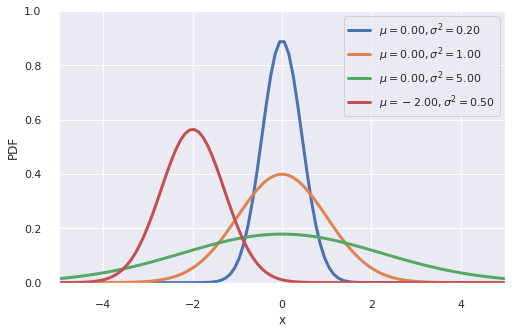

In [6]:

# plot PDFs
plt.figure(figsize=(8,5))
plt.plot(x, p0, lw=3, 
        label = f'$\mu = {mus[0]: .2f}, \sigma^2 = {sigmas[0]**2: .2f}$')
plt.plot(x, p2, lw=3, 
        label = f'$\mu = {mus[2]: .2f}, \sigma^2 = {sigmas[2]**2: .2f}$')
plt.plot(x, p3, lw=3, 
        label = f'$\mu = {mus[3]: .2f}, \sigma^2 = {sigmas[3]**2: .2f}$')
plt.plot(x, p1, lw=3, 
        label = f'$\mu = {mus[1]: .2f}, \sigma^2 = {sigmas[1]**2: .2f}$')
plt.ylim(bottom = 0, top = 1)
plt.xlim(left = -5, right = 5)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend();

# Create an interactive plot of the Gaussian PDF 
Define a function that adds noise to an ideal Gaussian PDF and wrap it in the ipywidget

In [9]:
def gauss(mu, sigma):
    p = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2/(2 * sigma**2))
    plt.figure(figsize=(8,5))
    plt.plot(x, p, lw=3, 
             label = f'$\mu = {mu: .2f}, \sigma = {sigma: .2f}$')
    plt.ylim(bottom = 0, top = 0.7)
    plt.xlim(left = -5, right = 5)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    return (p)


## Call the widget for the data generating function
Widgets allow you to interact with the plot by chaning the value of different parameters.

In [10]:
interact_gauss = interactive(gauss, 
                            mu = (-5, 5, 0.5), 
                            sigma = (0,5,0.2), 
                      continuous_update = False)
display(interact_gauss)


interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.5), FloatSlider(value…

# The integral of Gaussian function is the error function (erf)

For the Guassian function, the erf is the cumulative distribution fucntion (CDF):

$$erf(x)_{\bar{X}, \sigma} = \frac{1}{\sqrt{2 \pi \sigma^2}} \int_{- \infty}^x e^{-\frac{(x - \bar{X})^2}{2 \sigma^2}}$$

This looks complicated... in python the CDF is very easily calculated by summing the monotonically increasing elements of an array using `np.cumsum`,  see numpy documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html).








In [11]:
# calculate the CDFs from the PDFs (and normalize to 1)
cdf0 = np.cumsum(p0) / np.sum(p0)
cdf1 = np.cumsum(p1) / np.sum(p1)
cdf2 = np.cumsum(p2) / np.sum(p2)
cdf3 = np.cumsum(p3) / np.sum(p3)

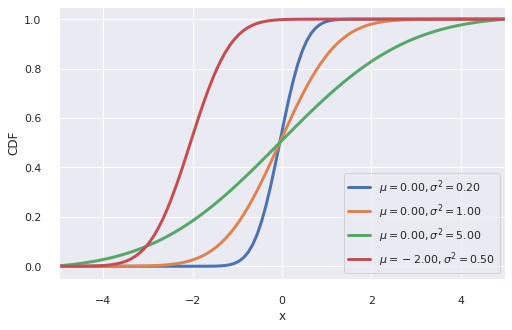

In [12]:
# plot CDFs
plt.figure(figsize=(8,5))
plt.plot(x, cdf0, lw=3, 
        label = f'$\mu = {mus[0]: .2f}, \sigma^2 = {sigmas[0]**2: .2f}$')
plt.plot(x, cdf2, lw=3, 
        label = f'$\mu = {mus[2]: .2f}, \sigma^2 = {sigmas[2]**2: .2f}$')
plt.plot(x, cdf3, lw=3, 
        label = f'$\mu = {mus[3]: .2f}, \sigma^2 = {sigmas[3]**2: .2f}$')
plt.plot(x, cdf1, lw=3, 
        label = f'$\mu = {mus[1]: .2f}, \sigma^2 = {sigmas[1]**2: .2f}$')
#plt.hlines(0.5, xmin = -5, xmax = 5, color='grey', linestyles='--')
plt.xlim(left = -5, right = 5)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend();

# Create an interactive plot of the Gaussian CDF

See how different values of $\mu$ and $\sigma$ affect the CDF

In [13]:
def cdf(mu, sigma):
    p = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2/(2 * sigma**2))
    cdf = np.cumsum(p) / np.sum(p)
    plt.figure(figsize=(8,5))
    plt.plot(x, cdf, lw=3, 
             label = f'$\mu = {mu: .2f}, \sigma = {sigma: .2f}$')
    plt.ylim(bottom = 0, top = 1)
    plt.xlim(left = -5, right = 5)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.legend()
    return (cdf)


In [14]:
interact_cdf = interactive(cdf, 
                            mu = (-5, 5, 0.5), 
                            sigma = (0,5,0.2), 
                      continuous_update = False)
display(interact_cdf)

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.5), FloatSlider(value…